# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

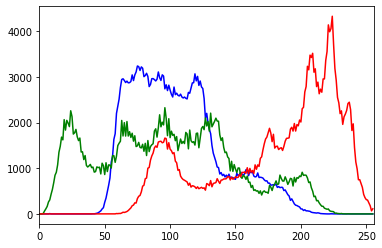

In [1]:
import cv2
import numpy as np

img = cv2.imread('lena.png', cv2.IMREAD_COLOR)
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
change_percentage = 0.4
hls_down = hls.astype('float32')
hls_down[..., -1] = hls_down[..., -1]/255 - change_percentage
hls_down[hls_down[..., -1] < 0] = 210
hls_down[..., -1] = hls_down[..., -1]*255
hls_down = hls_down.astype('uint8')

hls_up =hls.astype('float32')
hls_up[..., -1] = hls_up[..., -1]/255 + change_percentage
hls_up[hls_up[..., -1] > 1] = 60
hls_up[..., -1] = hls_up[..., -1]*255
hls_up = hls_up.astype('uint8')

hls_down = cv2.cvtColor(hls_down,cv2.COLOR_HLS2BGR)
hls_up = cv2.cvtColor(hls_up,cv2.COLOR_HLS2BGR)
hls_change = np.hstack((img, hls_down, hls_up))
cv2.imshow('change saturation', hls_change)

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('lena.png')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.show()

add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=1)# alpha: 控制對比度 (1.0~3.0
add_lighness = cv2.convertScaleAbs(img, alpha=3.0, beta=150)# beta: 控制明亮度 (0~255)
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
cv2.imshow('adjust contrast and brighness', img_contrast_light)

cv2.waitKey(0)
cv2.destroyAllWindows()



## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

In [0]:
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
change_percentage = 0.4
hls_down = hls.astype('float32')
hls_down[..., -1] = hls_down[..., -1]/255 - change_percentage
hls_down[hls_down[..., -1] < 0] = 210
hls_down[..., -1] = hls_down[..., -1]*255
hls_down = hls_down.astype('uint8')

hls_up =hls.astype('float32')
hls_up[..., -1] = hls_up[..., -1]/255 + change_percentage
hls_up[hls_up[..., -1] > 1] = 60
hls_up[..., -1] = hls_up[..., -1]*255
hls_up = hls_up.astype('uint8')

hls_down = cv2.cvtColor(hls_down,cv2.COLOR_HLS2BGR)
hls_up = cv2.cvtColor(hls_up,cv2.COLOR_HLS2BGR)
hls_change = np.hstack((img, hls_down, hls_up))
cv2.imshow('change saturation', hls_change)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [0]:
# case 1
# 每個 channel 個別做直方圖均衡
equalHist_by_channel = 

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = 

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = 

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
while True:
    # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
    cv2.imshow('bgr equal histogram', img_bgr_equalHist)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 調整對比 / 明亮

In [0]:
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=1)# alpha: 控制對比度 (1.0~3.0
add_lighness = cv2.convertScaleAbs(img, alpha=3.0, beta=150)# beta: 控制明亮度 (0~255)
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
cv2.imshow('adjust contrast and brighness', img_contrast_light)

cv2.waitKey(0)
cv2.destroyAllWindows()